##Write down the Objectives, Hypothesis and Experimental description for the above problem


In [1]:
## Write your code here## Write your code
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten,Reshape, LeakyReLU as LR,Activation, Dropout
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

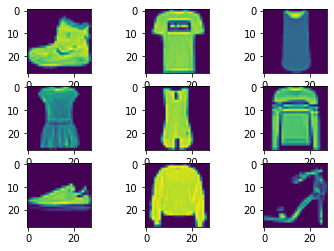

In [3]:

train_X=trainX[:]
train_Y=trainy[:]
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i])
# show the figure

In [4]:
print(set(train_Y))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [5]:
# ONE HOT ENCODING
from tensorflow.keras.utils import to_categorical
trainY_encoded=to_categorical(train_Y)
testY_encoded=to_categorical(testy)

In [6]:
trainY_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [7]:
train_X.shape

(60000, 28, 28)

# Using NN for image classification

In [8]:
trainX_flatten=train_X.reshape(60000,784)
testX_flatten=testX.reshape(10000,784)

In [9]:
trainX_flatten.shape

(60000, 784)

In [10]:
print(set(trainX_flatten[0]))

{0, 1, 2, 3, 4, 6, 7, 10, 12, 13, 15, 18, 23, 29, 35, 36, 40, 41, 44, 48, 52, 54, 55, 56, 57, 58, 61, 62, 64, 65, 66, 67, 69, 72, 73, 74, 75, 77, 80, 82, 88, 92, 98, 99, 102, 106, 107, 109, 115, 117, 119, 121, 122, 123, 127, 130, 134, 136, 141, 144, 145, 146, 150, 154, 155, 156, 159, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 255}


In [11]:
mn=np.mean(trainX_flatten)
sd=np.std(trainX_flatten)
epsi=1e-10
print(trainX_flatten.shape)
trainX_flatten=(trainX_flatten-mn)/(epsi + sd)
print(trainX_flatten.shape)

(60000, 784)
(60000, 784)


In [12]:
mn=np.mean(testX_flatten)
sd=np.std(testX_flatten)
epsi=1e-10
testX_flatten=(testX_flatten-mn)/(epsi + sd)

In [13]:
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
print(testX_flatten.shape)

(10000, 784)


In [15]:
model.fit(trainX_flatten,trainY_encoded, batch_size=128, epochs=10, validation_data=(testX_flatten,testY_encoded))

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4964 - accuracy: 0.8234 - val_loss: 0.4294 - val_accuracy: 0.8443
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3641 - accuracy: 0.8682 - val_loss: 0.3900 - val_accuracy: 0.8610
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3271 - accuracy: 0.8815 - val_loss: 0.3875 - val_accuracy: 0.8616
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3039 - accuracy: 0.8885 - val_loss: 0.3632 - val_accuracy: 0.8688
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2859 - accuracy: 0.8939 - val_loss: 0.3538 - val_accuracy: 0.8740
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2699 - accuracy: 0.9001 - val_loss: 0.3536 - val_accuracy: 0.8735
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2576 - accuracy: 0.9040 - val_loss: 0.3547 - val_accuracy: 0.8750
Epoch 

# Using CNN FOR IMAGE Classification

In [16]:
trainX_cnn=train_X.reshape(train_X.shape[0],28,28,1)
testX_cnn=testX.reshape(testX.shape[0],28,28,1)

In [17]:
[train_Y]

[array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)]

In [18]:
testX_cnn.shape

(10000, 28, 28, 1)

In [19]:


# to calculate accuracy
#from sklearn.metrics import accuracy_score


In [26]:
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [27]:
history=model.fit(trainX_cnn,trainY_encoded, batch_size=128, epochs=10, validation_data=(testX_cnn, testY_encoded))

Epoch 1/10
469/469 [==============================] - 25s 54ms/step - loss: 1.8267 - accuracy: 0.8098 - val_loss: 0.4337 - val_accuracy: 0.8526
Epoch 2/10
469/469 [==============================] - 25s 52ms/step - loss: 0.3415 - accuracy: 0.8803 - val_loss: 0.3724 - val_accuracy: 0.8701
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 0.2738 - accuracy: 0.8999 - val_loss: 0.3447 - val_accuracy: 0.8800
Epoch 4/10
469/469 [==============================] - 23s 49ms/step - loss: 0.2386 - accuracy: 0.9115 - val_loss: 0.3206 - val_accuracy: 0.8903
Epoch 5/10
469/469 [==============================] - 27s 57ms/step - loss: 0.2095 - accuracy: 0.9223 - val_loss: 0.3454 - val_accuracy: 0.8824
Epoch 6/10
469/469 [==============================] - 25s 53ms/step - loss: 0.1913 - accuracy: 0.9287 - val_loss: 0.3547 - val_accuracy: 0.8853
Epoch 7/10
469/469 [==============================] - 25s 54ms/step - loss: 0.1779 - accuracy: 0.9335 - val_loss: 0.3323 - val_accuracy:

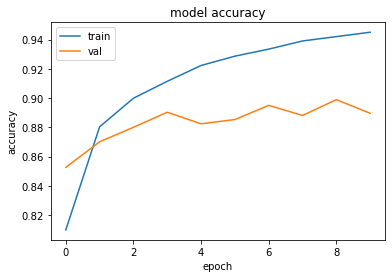

In [28]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

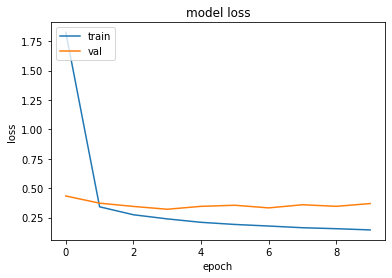

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [139]:
test_predictions = model.predict(testX_cnn)

In [150]:
train_predictions=model.predict(trainX_cnn)

In [152]:
train_predictions.shape

(60000, 10)

In [154]:
confusiontrain = confusion_matrix(trainy, np.argmax(train_predictions,axis=1))

In [140]:
test_predictions.shape

(10000, 10)

In [141]:
testY_encoded.shape

(10000, 10)

In [188]:
y_predtest=np.argmax(test_predictions,axis=1)

In [189]:
y_predtrain=np.argmax(train_predictions,axis=1)

In [180]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
confusiontest = confusion_matrix(testy, np.argmax(test_predictions,axis=1))

# FOR TRAIN SET

In [174]:
#For Training Dataset
confusiontrain

array([[5521,    6,   68,   63,   11,    0,  325,    0,    6,    0],
       [   8, 5921,    0,   46,    0,    0,    7,    0,   16,    2],
       [  13,    0, 5501,   21,  254,    0,  209,    2,    0,    0],
       [  20,    5,    6, 5887,   37,    0,   42,    0,    3,    0],
       [  10,    0,  192,  108, 5452,    0,  235,    0,    3,    0],
       [   0,    0,    0,    0,    0, 5988,    0,   12,    0,    0],
       [ 252,    1,  124,   63,  155,    0, 5397,    1,    5,    2],
       [   0,    0,    0,    0,    0,    4,    0, 5973,    0,   23],
       [   4,    0,    0,    6,    1,    0,   29,    0, 5959,    1],
       [   0,    1,    0,    0,    0,    5,    0,   47,    1, 5946]],
      dtype=int64)

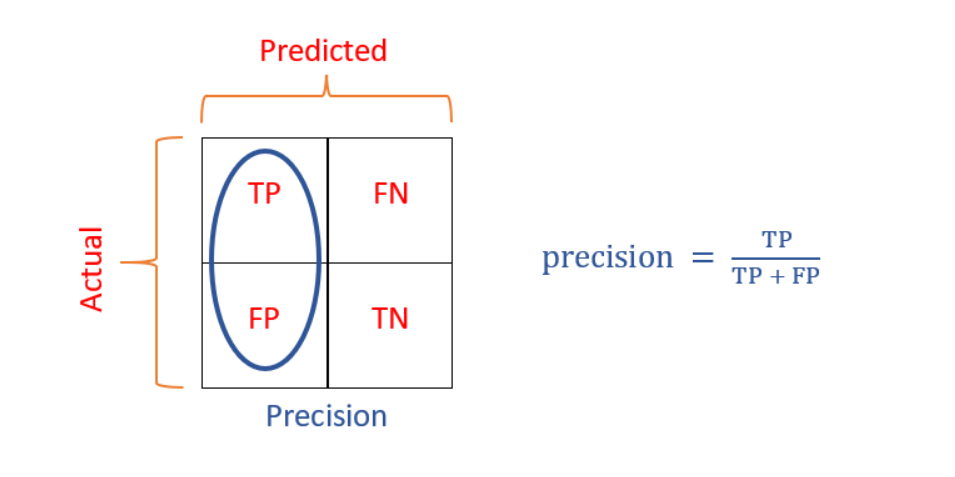

In [183]:
for i in range(10):
    ac=confusiontrain[i][i]/(np.sum(confusiontrain[:,i]))
    print("Precison for label ",i,ac*100)

Precison for label  0 94.73232669869594
Precison for label  1 99.7809234917425
Precison for label  2 93.37973179426243
Precison for label  3 95.04359057152084
Precison for label  4 92.25042301184433
Precison for label  5 99.84992496248124
Precison for label  6 86.43497757847534
Precison for label  7 98.97265948632975
Precison for label  8 99.43267145002504
Precison for label  9 99.53130231001003


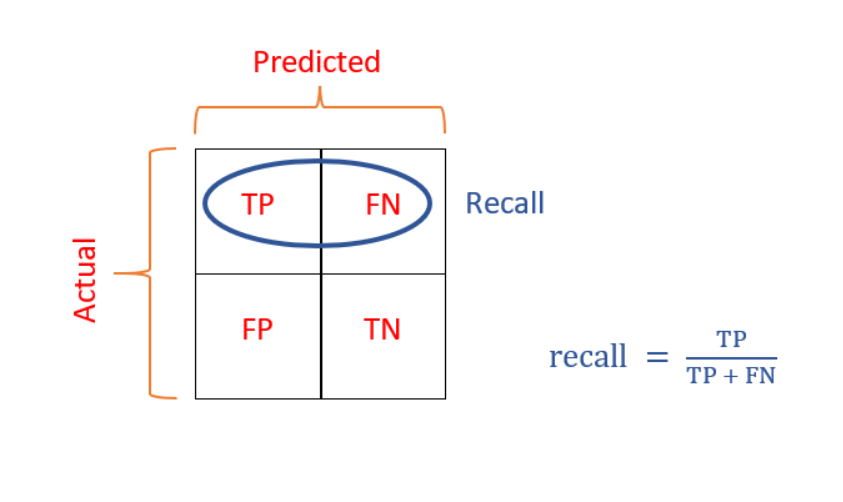

In [184]:
for i in range(10):
    ac=confusiontrain[i][i]/(np.sum(confusiontrain[i,:]))
    print("Recall for label ",i,ac*100)

Recall for label  0 92.01666666666667
Recall for label  1 98.68333333333334
Recall for label  2 91.68333333333332
Recall for label  3 98.11666666666666
Recall for label  4 90.86666666666666
Recall for label  5 99.8
Recall for label  6 89.95
Recall for label  7 99.55000000000001
Recall for label  8 99.31666666666666
Recall for label  9 99.1


In [191]:
print(classification_report(trainy, y_predtrain))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      6000
           1       1.00      0.99      0.99      6000
           2       0.93      0.92      0.93      6000
           3       0.95      0.98      0.97      6000
           4       0.92      0.91      0.92      6000
           5       1.00      1.00      1.00      6000
           6       0.86      0.90      0.88      6000
           7       0.99      1.00      0.99      6000
           8       0.99      0.99      0.99      6000
           9       1.00      0.99      0.99      6000

    accuracy                           0.96     60000
   macro avg       0.96      0.96      0.96     60000
weighted avg       0.96      0.96      0.96     60000



# FOR TEST SET

In [175]:
# FOR TEST DATASET
confusiontest

array([[802,   3,  26,  32,   6,   2, 123,   0,   6,   0],
       [  1, 962,   1,  21,   4,   0,   6,   0,   5,   0],
       [ 14,   0, 824,  10,  74,   0,  78,   0,   0,   0],
       [ 19,   7,  12, 907,  24,   0,  26,   0,   3,   2],
       [  1,   1,  73,  40, 801,   0,  80,   0,   4,   0],
       [  0,   0,   0,   0,   0, 974,   0,  17,   1,   8],
       [120,   0,  72,  31,  67,   0, 697,   0,  13,   0],
       [  0,   0,   0,   0,   0,  14,   0, 962,   1,  23],
       [  3,   0,   2,   6,   1,   2,  11,   4, 971,   0],
       [  1,   0,   0,   1,   0,   9,   0,  34,   0, 955]], dtype=int64)

In [176]:
confusiontest[:,1]

array([  3, 962,   0,   7,   1,   0,   0,   0,   0,   0], dtype=int64)

In [177]:
# PRECISION 
for i in range(10):
    ac=confusiontest[i][i]/(np.sum(confusiontest[:,i]))
    print("Precison for label ",i,ac*100)

Precison for label  0 83.45473465140478
Precison for label  1 98.86947584789311
Precison for label  2 81.58415841584159
Precison for label  3 86.54580152671755
Precison for label  4 81.985670419652
Precison for label  5 97.30269730269731
Precison for label  6 68.2664054848188
Precison for label  7 94.59193706981318
Precison for label  8 96.71314741035857
Precison for label  9 96.65991902834008


In [178]:
#Recall
for i in range(10):
    ac=confusiontest[i][i]/(np.sum(confusiontest[i,:]))
    print("Recall for label ",i,ac*100)

Recall for label  0 80.2
Recall for label  1 96.2
Recall for label  2 82.39999999999999
Recall for label  3 90.7
Recall for label  4 80.10000000000001
Recall for label  5 97.39999999999999
Recall for label  6 69.69999999999999
Recall for label  7 96.2
Recall for label  8 97.1
Recall for label  9 95.5


In [190]:
print(classification_report(testy, y_predtest))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.82      0.82      1000
           3       0.87      0.91      0.89      1000
           4       0.82      0.80      0.81      1000
           5       0.97      0.97      0.97      1000
           6       0.68      0.70      0.69      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [41]:
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(150, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history=model.fit(trainX_cnn,trainY_encoded, batch_size=128, epochs=10, validation_data=(testX_cnn, testY_encoded))


Epoch 1/10
469/469 [==============================] - 23s 48ms/step - loss: 1.7768 - accuracy: 0.8194 - val_loss: 0.3835 - val_accuracy: 0.8656
Epoch 2/10
469/469 [==============================] - 22s 48ms/step - loss: 0.3086 - accuracy: 0.8899 - val_loss: 0.3655 - val_accuracy: 0.8709
Epoch 3/10
469/469 [==============================] - 22s 48ms/step - loss: 0.2546 - accuracy: 0.9082 - val_loss: 0.3238 - val_accuracy: 0.8848
Epoch 4/10
469/469 [==============================] - 23s 48ms/step - loss: 0.2218 - accuracy: 0.9177 - val_loss: 0.3188 - val_accuracy: 0.8918
Epoch 5/10
469/469 [==============================] - 23s 48ms/step - loss: 0.1960 - accuracy: 0.9278 - val_loss: 0.3111 - val_accuracy: 0.8956
Epoch 6/10
469/469 [==============================] - 22s 48ms/step - loss: 0.1784 - accuracy: 0.9330 - val_loss: 0.3239 - val_accuracy: 0.8946
Epoch 7/10
469/469 [==============================] - 25s 53ms/step - loss: 0.1663 - accuracy: 0.9380 - val_loss: 0.3277 - val_accuracy:

# pooling layer (3,3)

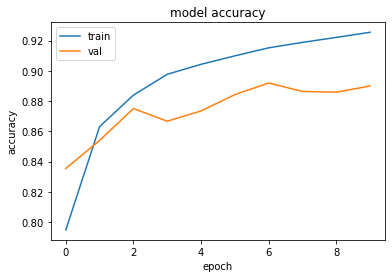

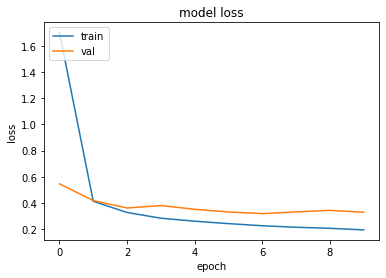

In [33]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# pooling layer (4,4)

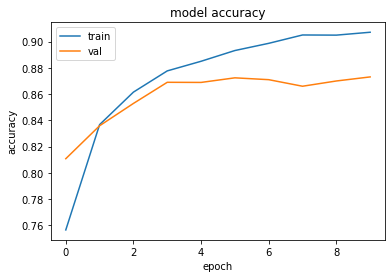

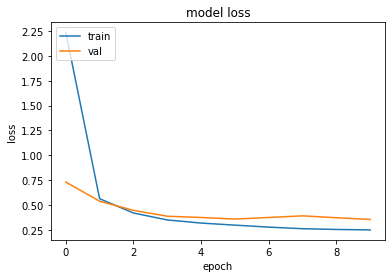

In [35]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# kernal size (5,5)

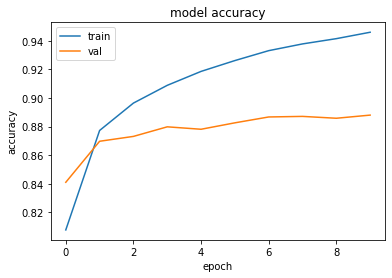

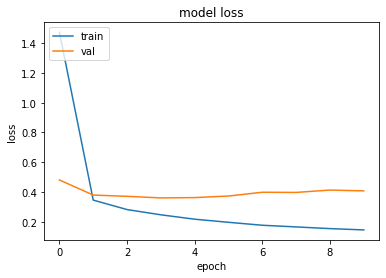

In [38]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# hidden layer size =50

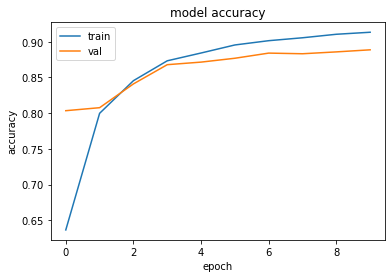

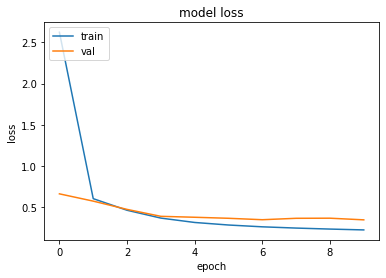

In [40]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Hidden layer size 150

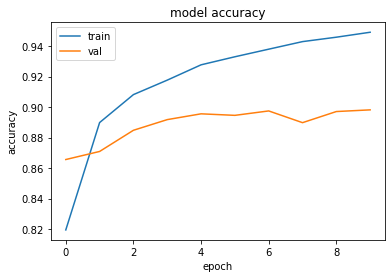

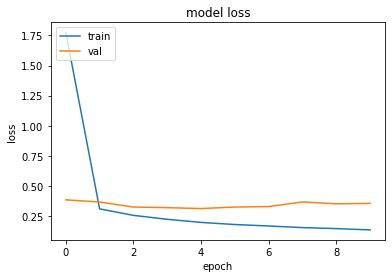

In [42]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()